C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


val acc:0.12 | lr:3.349021235151909e-05, weight decay:1.019516125797098e-08
val acc:0.12 | lr:7.077225494898347e-05, weight decay:1.9157440434602137e-06
val acc:0.09 | lr:7.460343938504465e-06, weight decay:1.5932555672842522e-08
val acc:0.1475 | lr:8.998386431267278e-05, weight decay:3.749684992609022e-08
val acc:0.1175 | lr:0.00021183336296072097, weight decay:3.1876600551929005e-05
val acc:0.165 | lr:0.0005977404055244704, weight decay:1.2358833313148183e-08
val acc:0.1375 | lr:0.0002060757473632599, weight decay:3.0411005832179005e-08
val acc:0.0675 | lr:3.666793673543543e-06, weight decay:1.8161280863503486e-06
val acc:0.1025 | lr:2.744186716448357e-06, weight decay:1.176641888492202e-08
val acc:0.185 | lr:0.0003718615668778175, weight decay:5.8312367628102656e-05
val acc:0.09 | lr:6.140475122209595e-06, weight decay:1.2701502482422655e-06
val acc:0.195 | lr:0.0006166832423937098, weight decay:2.5912252101701746e-05
val acc:0.135 | lr:5.0805140017206795e-06, weight decay:9.8029005

Best-13(val acc:0.565) | lr:0.0027717950461861904, weight decay:2.777484315638781e-06
Best-14(val acc:0.41) | lr:0.0014969466894628068, weight decay:1.8669003462464243e-05
Best-15(val acc:0.4075) | lr:0.0018664477708832956, weight decay:5.5697653386756586e-06
Best-16(val acc:0.3725) | lr:0.0017255660653198942, weight decay:1.2874209366253683e-07
Best-17(val acc:0.37) | lr:0.0026885617254884283, weight decay:7.710923465944327e-07
Best-18(val acc:0.3375) | lr:0.0017323929925548063, weight decay:2.1734910487215155e-08
Best-19(val acc:0.3325) | lr:0.0019100470604210941, weight decay:1.1676361805541433e-08
Best-20(val acc:0.32) | lr:0.0022906869619604316, weight decay:2.1383725632700044e-05


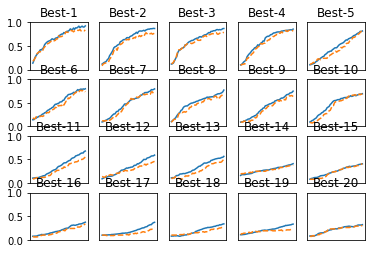

In [1]:
# -----가중치 감소 계수와 학습률 하이퍼파라미터를 최적화하는 문제 -----
from pickle import load
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습속도를 높이기 위해 훈련데이터 크기를 줄인다.
x_train = x_train[:500]
t_train = t_train[:500]

# 훈련데이터의 20%를 검증데이터로 분할
validation_ratio = 0.20
validation_num = int(validation_ratio*x_train.shape[0])
x_train, t_train = shuffle_dataset(x_train, t_train) # 데이터 뒤섞기
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

# 하이퍼파라미터 훈련
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10, 
                            weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val, epochs=epocs, mini_batch_size=100,
                        optimizer='sgd', optimizer_param={'lr':lr}, verbose=False)
    trainer.train()

    return trainer.train_acc_list, trainer.test_acc_list


# 하이퍼파라미터 무작위 탐색
optimization_trial = 100
result_val = {}
result_train = {}
for _ in range(optimization_trial):
    # 하이퍼파라미터의 대략적인 범위 설정
    weight_decay = 10**np.random.uniform(-8, -4)
    lr = 10**np.random.uniform(-6, -2)
    # ==================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    result_val[key] = val_acc_list
    result_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(result_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, result_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
